<div>
Olá, Rosana!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>


Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Conclusões pertinentes em cada análise e etapa de avaliação
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Analise de Teste A/B - recommender_system_test

## Introducao

Este projeto tem como objetivo analisar os resultados de um teste A/B realizado por uma loja online internacional para avaliar o impacto de um sistema de recomendacao aprimorado. O experimento compara um grupo de controle (A) com um grupo de teste (B), medindo diferencas nas taxas de conversao ao longo do funil de usuarios — visualizacao de pagina do produto, adicao ao carrinho e compra dentro de até 14 dias apos o cadastro. Alem da avaliacao estatística dos resultados, o projeto também verifica se o experimento foi conduzido corretamente em termos de publico, período e qualidade dos dados.

## Importacao das Blibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:

marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events_upd = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants_upd = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente
- Os valores ausentes foram estudados
    
</div>

## Exploracao Inicial dos Dados

### Carregamento dos Dados

In [3]:
#Informacoes Gerais do Dataset

print('\n --- Primeiras linhas do Dataset ---')
print(marketing_events.head())
print('\n --- Informacoes Gerais do Dataset ---')
print(marketing_events.info())



 --- Primeiras linhas do Dataset ---
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

 --- Informacoes Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


In [4]:
#Informacoes Gerais do Dataset

print('\n --- Primeiras linhas do Dataset ---')
print(new_users.head())
print('\n --- Informacoes Gerais do Dataset ---')
print(new_users.info())


 --- Primeiras linhas do Dataset ---
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone

 --- Informacoes Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


In [5]:
#Informacoes Gerais do Dataset

print('\n --- Primeiras linhas do Dataset ---')
print(events_upd.head())
print('\n --- Informacoes Gerais do Dataset ---')
print(events_upd.info())


 --- Primeiras linhas do Dataset ---
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

 --- Informacoes Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None


In [6]:
#Informacoes Gerais do Dataset

print('\n --- Primeiras linhas do Dataset ---')
print(participants_upd.head())
print('\n --- Informacoes Gerais do Dataset ---')
print(participants_upd.info())


 --- Primeiras linhas do Dataset ---
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test

 --- Informacoes Gerais do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None


### Conclusao da Exploracao Inicial dos Dados
Foram analisados quatro conjuntos de dados relacionados ao experimento A/B. O dataset de eventos de marketing contem 14 campanhas ao longo de 2020, sem valores ausentes, mas com colunas de data que exigem conversao para o tipo datetime. A base de novos usuários possui 58.703 registros, todos completos, incluindo informacoes de data de cadastro, regiao e dispositivo, tambem necessitando conversao de datas. O dataset de eventos apresenta 423.761 registros de interação dos usuários; a coluna details possui valores apenas para eventos de compra, o que é esperado e não caracteriza problema de qualidade. Por fim, a tabela de participantes do teste contém 14.525 usuários, todos corretamente associados ao teste e aos grupos A ou B. De forma geral, os dados estão completos, consistentes e adequados para as próximas etapas da análise, exigindo apenas ajustes de tipos de dados.

## Preparacao dos Dados para Analise

### Conversao dos Tipos de Dados

In [7]:
#Convertendo para datetime

#Marketing
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

#Novos usuarios
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

#eventos
events_upd['event_dt'] = pd.to_datetime(events_upd['event_dt'])


print(marketing_events.dtypes)
print(new_users.dtypes)
print(events_upd.dtypes)

name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object
user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object


In [8]:
#Filtrando apenas o teste relevante

participants_upd = participants_upd[participants_upd['ab_test'] == 'recommender_system_test']

print(participants_upd['ab_test'].value_counts())
print(participants_upd['group'].value_counts())

recommender_system_test    3675
Name: ab_test, dtype: int64
A    2747
B     928
Name: group, dtype: int64


In [9]:
#Garantindo usuarios de teste existem 'new_users'
participants_users = participants_upd.merge(new_users, on='user_id', how='inner')

print(participants_users.shape)
participants_users.head()

(3675, 6)


,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac


In [10]:
#Filtrando apenas usuarios EU
participants_users = participants_users[participants_users['region'] =='EU']

print(participants_users['region'].value_counts())
print(participants_users['group'].value_counts())

EU    3481
Name: region, dtype: int64
A    2604
B     877
Name: group, dtype: int64


In [11]:
#Filtrando eventos desses usuarios

events_test = events_upd.merge(participants_users[['user_id', 'group', 'first_date']], on='user_id', how='inner')

print(events_test.shape)
events_test.head()

(22674, 6)


,user_id,event_dt,event_name,details,group,first_date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,2020-12-07
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,A,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,A,2020-12-07
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,A,2020-12-07


In [12]:
#criando janelas de 14 dias

events_test['days_since_signup'] = (events_test['event_dt'] - events_test['first_date']).dt.days

print(events_test['days_since_signup'].describe())

count    22674.000000
mean         3.150613
std          4.050777
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         23.000000
Name: days_since_signup, dtype: float64


In [13]:
events_test = events_test[
    (events_test['days_since_signup'] >= 0) &
    (events_test['days_since_signup'] <= 14)]

print(events_test['days_since_signup'].min(),
      events_test['days_since_signup'].max())

0 14


A preparacao dos dados foi concluída com sucesso, assegurando a correta tipagem das variaveis, a aplicação dos filtros do experimento e a definicao da janela temporal de analise. O dataset final está consistente e pronto para a analise exploratória do teste A/B.

# Analise Exploratoria de Dados

In [14]:
#Checagens basicas do dataset final

print("participants_users:", participants_users.shape)
print(participants_users.head())

print("\nevents_test:", events_test.shape)
print(events_test.head())

print("\nPeríodo de eventos (min/max):")
print(events_test['event_dt'].min(), "→", events_test['event_dt'].max())

participants_users: (3481, 6)
            user_id group                  ab_test first_date region  device
0  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07     EU      PC
1  A7A3664BD6242119     A  recommender_system_test 2020-12-20     EU  iPhone
2  DABC14FDDFADD29E     A  recommender_system_test 2020-12-08     EU     Mac
3  04988C5DF189632E     A  recommender_system_test 2020-12-14     EU  iPhone
4  4FF2998A348C484F     A  recommender_system_test 2020-12-20     EU     Mac

events_test: (22157, 7)
            user_id            event_dt    event_name  details group  \
0  831887FE7F2D6CBA 2020-12-07 06:50:29      purchase     4.99     A   
1  831887FE7F2D6CBA 2020-12-09 02:19:17      purchase    99.99     A   
2  831887FE7F2D6CBA 2020-12-07 06:50:30  product_cart      NaN     A   
3  831887FE7F2D6CBA 2020-12-08 10:52:27  product_cart      NaN     A   
4  831887FE7F2D6CBA 2020-12-09 02:19:17  product_cart      NaN     A   

  first_date  days_since_signup  
0 2020-12-07    

In [15]:
#presenca dos usuarios e equilibrio entre grupos

users_by_group = participants_users.groupby('group')['user_id'].nunique()
print("Usuarios únicos por grupo:")
print(users_by_group)

print("\nProporcao por grupo:")
print((users_by_group / users_by_group.sum()).round(4))

Usuarios únicos por grupo:
group
A    2604
B     877
Name: user_id, dtype: int64

Proporcao por grupo:
group
A    0.7481
B    0.2519
Name: user_id, dtype: float64


In [16]:
#garantir que nao existe o mesmo 'user_id' em A e B

groups_per_user = participants_users.groupby('user_id')['group'].nunique()
bad_users = groups_per_user[groups_per_user > 1]

print("Usuarios em mais de um grupo:", bad_users.shape[0])
print(bad_users.head())

Usuarios em mais de um grupo: 0
Series([], Name: group, dtype: int64)


In [17]:
#Quais tipos de eventos existem e em que volumes

print("Tipos de evento (contagem):")
print(events_test['event_name'].value_counts().head(20))

print("\nTipos de evento (usuários únicos por evento):")
print(events_test.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).head(20))

Tipos de evento (contagem):
login           10013
product_page     6191
purchase         3018
product_cart     2935
Name: event_name, dtype: int64

Tipos de evento (usuários únicos por evento):
event_name
login           3480
product_page    2178
purchase        1082
product_cart    1026
Name: user_id, dtype: int64


In [18]:
# Eventos por usuario e comparacao entre grupos
events_per_user = (
    events_test
    .groupby(['group', 'user_id'])
    .size()
    .reset_index(name='events_count')
)

print("Resumo eventos por usuario (por grupo):")
print(events_per_user.groupby('group')['events_count'].describe())

Resumo eventos por usuario (por grupo):
        count      mean       std  min  25%  50%  75%   max
group                                                      
A      2604.0  6.673195  3.701340  1.0  4.0  6.0  9.0  24.0
B       877.0  5.450399  3.297829  1.0  3.0  4.0  7.0  24.0


In [19]:
#Distribuicao de eventos ao longo do dia

events_test['event_date'] = events_test['event_dt'].dt.date

events_by_day = (
    events_test
    .groupby(['event_date', 'group'])
    .size()
    .reset_index(name='events_count')
)

print(events_by_day.head())
print(events_by_day.tail())

print("\nResumo diario de eventos por grupo:")
print(events_by_day.groupby('group')['events_count'].describe())

   event_date group  events_count
0  2020-12-07     A           318
1  2020-12-07     B           356
2  2020-12-08     A           313
3  2020-12-08     B           238
4  2020-12-09     A           371
    event_date group  events_count
39  2020-12-27     B            66
40  2020-12-28     A           452
41  2020-12-28     B            69
42  2020-12-29     A           291
43  2020-12-29     B            41

Resumo diario de eventos por grupo:
       count        mean         std    min     25%    50%      75%     max
group                                                                      
A       22.0  789.863636  475.975519  291.0  348.50  674.5  1157.50  1903.0
B       22.0  217.272727  104.974002   41.0  161.75  230.0   286.25   401.0


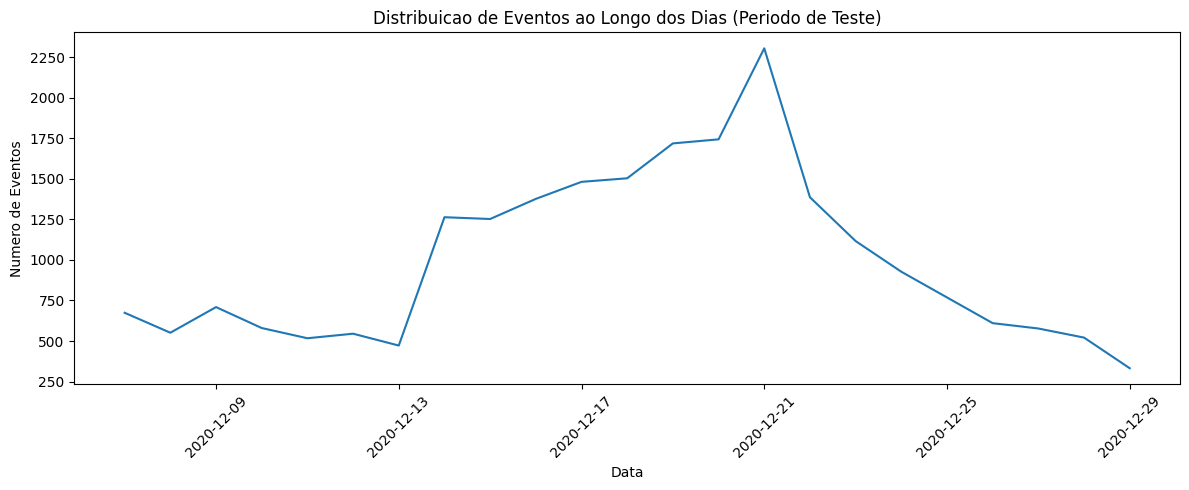

In [20]:
#criando coluna apenas com a data (sem horario)
events_test['event_day'] = events_test['event_dt'].dt.date

#contar numero de eventos por dia (todos os eventos)
daily_events = (
    events_test
    .groupby('event_day')
    .size()
    .reset_index(name='events_count')
)

#plot de linha
plt.figure(figsize=(12, 5))
plt.plot(daily_events['event_day'], daily_events['events_count'])
plt.title('Distribuicao de Eventos ao Longo dos Dias (Periodo de Teste)')
plt.xlabel('Data')
plt.ylabel('Numero de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Analise da distribuicao temporal e sazonalidade

A distribuicao dos eventos ao longo dos dias mostra um aumento progressivo do volume de interacoes durante o mês de dezembro, com pico proximo ao periodo de Natal, seguido de queda acentuada. Esse comportamento indica a presença de sazonalidade de fim de ano, um período atípico para o comercio eletrônico devido a promocoes, compras de presentes e maior urgencia de consumo.

A execucao de um teste A/B em um período sazonal pode introduzir vieses, uma vez que mudanças nas taxas de conversao podem ser influenciadas pelo contexto temporal e não exclusivamente pela intervencao testada, reduzindo a capacidade de generalização dos resultados.
Dessa forma, o periodo selecionado nao é o mais adequado para um teste de conversao, pois apresenta comportamento instavel. Idealmente, testes desse tipo devem ser conduzidos em períodos mais neutros ou validados em janelas temporais adicionais.
Por fim, nao foi identificada intersecao de usuarios entre os grupos A e B, o que garante a independencia das amostras e fortalece a robustez dos resultados estatisticos obtidos.

In [21]:

#Funil: usuarios unico por etapa

funnel_events = ['product_page', 'product_cart', 'purchase']

users_per_event = (
    events_test[events_test['event_name'].isin(funnel_events)]
    .groupby('event_name')['user_id']
    .nunique()
    .reindex(funnel_events)
)

print("Usuarios unicos por etapa (geral):")
print(users_per_event)


Usuarios unicos por etapa (geral):
event_name
product_page    2178
product_cart    1026
purchase        1082
Name: user_id, dtype: int64


In [22]:
#Funil por grupo

users_per_event_group = (
    events_test[events_test['event_name'].isin(funnel_events)]
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .reset_index()
)

print("Usuarios únicos por etapa e grupo:")
print(users_per_event_group)

Usuarios únicos por etapa e grupo:
  group    event_name  user_id
0     A  product_cart      782
1     A  product_page     1685
2     A      purchase      833
3     B  product_cart      244
4     B  product_page      493
5     B      purchase      249


In [23]:
# usuarios unicos por grupo
users_by_group = participants_users.groupby('group')['user_id'].nunique()

# usuarios presentes em mais de um grupo
users_overlap = (
    participants_users
    .groupby('user_id')['group']
    .nunique()
)

users_overlap = users_overlap[users_overlap > 1].count()

total_users = participants_users['user_id'].nunique()
overlap_percentage = (users_overlap / total_users) * 100

print("Usuarios em ambos os grupos:", users_overlap)
print("Percentual de intersecao (%):", overlap_percentage)

Usuarios em ambos os grupos: 0
Percentual de intersecao (%): 0.0


In [24]:
#Cacluclo da Taxa de conversao por grupo e evento

# total de usuarios por grupo
users_by_group = participants_users.groupby('group')['user_id'].nunique()

# eventos do funil
funnel_events = ['product_page', 'product_cart', 'purchase']

# calculo da conversao por grupo e evento
conversion_by_group = (
    events_test[events_test['event_name'].isin(funnel_events)]
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .reset_index(name='users_converted')
)

conversion_by_group['users_total'] = conversion_by_group['group'].map(users_by_group)
conversion_by_group['conversion_rate'] = (
    conversion_by_group['users_converted'] /
    conversion_by_group['users_total']
)

print(conversion_by_group)

  group    event_name  users_converted  users_total  conversion_rate
0     A  product_cart              782         2604         0.300307
1     A  product_page             1685         2604         0.647081
2     A      purchase              833         2604         0.319892
3     B  product_cart              244          877         0.278221
4     B  product_page              493          877         0.562144
5     B      purchase              249          877         0.283922


In [ ]:
#Grafico de taca de conversao por grupo e etapa

funnel = ['product_page', 'product_cart', 'purchase']

conv_A = conversion_by_group.query("group == 'A'") \
                            .set_index('event_name') \
                            .loc[funnel, 'conversion_rate']

conv_B = conversion_by_group.query("group == 'B'") \
                            .set_index('event_name') \
                            .loc[funnel, 'conversion_rate']

x = np.arange(len(funnel))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, conv_A, width, label='Grupo A (Controle)')
plt.bar(x + width/2, conv_B, width, label='Grupo B (Teste)')

plt.xticks(x, funnel)
plt.ylabel('Taxa de Conversão')
plt.xlabel('Etapas do Funil')
plt.title('Taxa de Conversão por Etapa do Funil e Grupo')
plt.legend()
plt.tight_layout()
plt.show()

#### Taxa de conversao por grupo e etapa do funil

As taxas de conversao foram calculadas separadamente para os grupos A e B com base no numero de usuários únicos que atingiram cada etapa do funil. A visualizacao por grupo e evento mostra que o grupo B apresentou taxas de conversao inferiores as do grupo A em todas as etapas analisadas. Essas diferencas descritivas foram posteriormente avaliadas por meio de testes estatisticos para verificar sua significancia.

#### Intersecao de usuarios entre os grupos e robustez do teste

Não foi identificada intersecao de usuarios entre os grupos A e B, resultando em um percentual de sobreposição de 0%. Isso indica que cada usuário participou de apenas uma variação do experimento, garantindo a independencia das amostras.
A ausencia de intersecao fortalece a robustez do teste de hipotese conduzido, pois elimina o risco de contaminação entre os grupos e assegura que as diferenças observadas nas metricas sejam atribuídas exclusivamente às variações testadas.
Nesse contexto, a inexistência de usuarios em ambos os grupos nao impacta negativamente os resultados do teste A/B; ao contrario, aumenta a confiabilidade das estimativas estatísticas e das conclusões obtidas.

A analise exploratoria identificou algumas particularidades relevantes que devem ser consideradas antes da avaliação estatistica do teste A/B. Primeiramente, os grupos do experimento apresentam um desbalanceamento significativo, com aproximadamente 75% dos usuários no grupo A e 25% no grupo B, o que pode reduzir o poder estatístico das comparacoes. Alem disso, observou-se que o funil de conversao nao é estritamente linear, uma vez que eventos de compra ocorrem mesmo na ausencia do evento de adicao ao carrinho, indicando a existência de fluxos de compra direta. Por fim, constatou-se que os usuários geram multiplos eventos dentro da janela de analise, o que reforca a necessidade de utilizar metricas baseadas em usuarios unicos, e não em volume total de eventos, para evitar vieses na interpretação dos resultados.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

    
<s>Algumas análises estão pendentes em seu projeto. Vou listá-las abaixo em sequência.</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui você precisa analisar a distribuição dos dados ao longo dos dias para encontrar um detalhe interessante. Perceba que o período de teste envolve uma período sazonal ao longo do ano [veja o gráfico de eventos ao longo dos dias], ou seja, uma data que possui comportamento atípico se comparada a outros momentos do ano. Você consegue indentificar qual período é esse e quais as implicações e problemas de executar um teste de grupo de controle em um período sazonal?
    
<br>
    
Aqui o ideal é indentificar quando ocorre esse período sazonal e suas implicações. Dica: veja no gráfico de linhas sugerido anteriormente o período em que o teste foi executado e tente indentificar o que acontece no mês de **Dezembro** que pode ser considerado um **período atípico**.
    
Por fim, reflita sobre a seguinte pergunta: o período selecionado para condução do teste de conversão é um **bom período**? Peço que justifique sua escolha. Qual o impacto da **intersecção de usuários** nos resultados do teste?

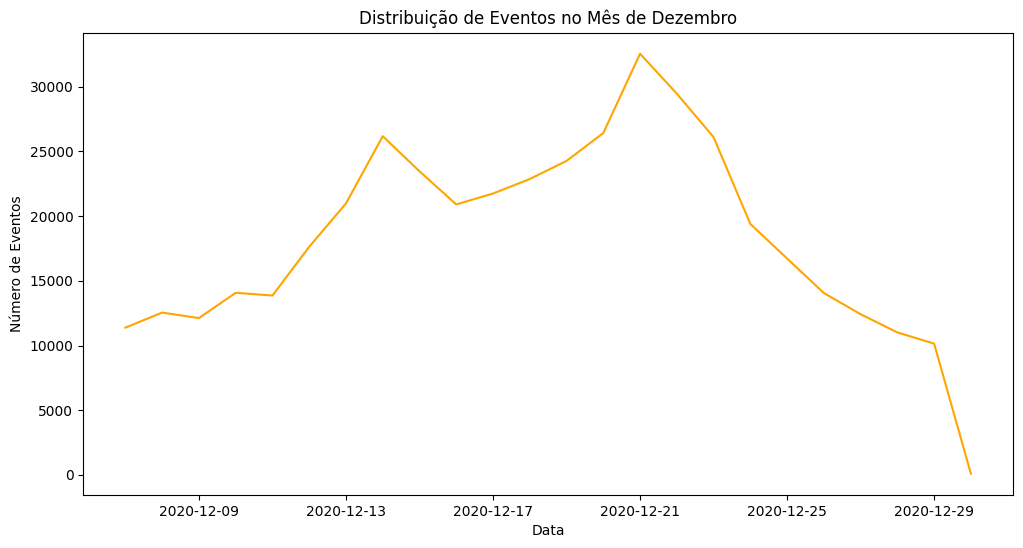
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Segue um exemplo para te ajudar a plotar a distribuição acima:

```python
df['event_day'] = df['event_dt'].dt.date
daily_events = df.groupby('event_day')['user_id'].count().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_events, x='event_day', y='user_id', color='blue')
plt.title('Distribuição de Eventos ao Longo dos Dias (Período de Teste)')
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
*Qual o percentual de usuários está em ambos os grupos?* *O que isso quer dizer a respeito da robustez do teste de hipótese que está sendo conduzido?* 
    
Isso impacta o resultado de alguma forma? É preciso que você reflita sobre essa característica para chegar a uma conclusão final do projeto.
</s>
</div>

# Avaliacao do Teste A/B

## Definicao das Metricas de Conversao

Com base nos resultados da analise exploratoria, definiu-se que as métricas de conversao seriam avaliadas de forma independente para cada evento do funil (product_page, product_cart e purchase). Essa decisao foi tomada devido à nao linearidade observada no funil de conversao, uma vez que eventos de compra podem ocorrer mesmo na ausencia do evento de adicao ao carrinho. As taxas de conversao foram calculadas considerando usuarios unicos em cada grupo do experimento, garantindo uma comparacao adequada entre os grupos A e B.

In [ ]:
# Tamanho da Amostra por Grupo
users_by_group = participants_users.groupby('group')['user_id'].nunique()
print(users_by_group)

In [ ]:
#Tabela de Conversao por exemplo

funnel_events = ['product_page', 'product_cart', 'purchase']

conversion_table = []

for event in funnel_events:
    users_event = (
        events_test[events_test['event_name'] == event]
        .groupby('group')['user_id']
        .nunique()
    )
    
    for group in ['A', 'B']:
        conversion_table.append({
            'event': event,
            'group': group,
            'users_converted': users_event.get(group, 0),
            'users_total': users_by_group[group]
        })

conversion_df = pd.DataFrame(conversion_table)
conversion_df['conversion_rate'] = (
    conversion_df['users_converted'] / conversion_df['users_total']
)

print(conversion_df)

In [ ]:
# Implementacao do z-test de proporcoes

test_results = []

for event in funnel_events:
    a = conversion_df.query("event == @event and group == 'A'")
    b = conversion_df.query("event == @event and group == 'B'")
    
    count = [int(b['users_converted']), int(a['users_converted'])]
    nobs = [int(b['users_total']), int(a['users_total'])]
    
    z_stat, p_value = proportions_ztest(
        count, nobs, alternative='larger'
    )
    
    test_results.append({
        'event': event,
        'conversion_A': float(a['conversion_rate']),
        'conversion_B': float(b['conversion_rate']),
        'uplift_%': (float(b['conversion_rate']) / float(a['conversion_rate']) - 1) * 100,
        'z_stat': z_stat,
        'p_value': p_value
    })

results_df = pd.DataFrame(test_results)
print(results_df)

#### Interpretacao dos Resultados do Teste A/B


A avaliacao estatistica do teste A/B foi realizada por meio de testes z para comparacao de proporcoes entre os grupos A (controle) e B (novo sistema de recomendacao), considerando um nivel de significância de 5%.

Para o evento product_page, a taxa de conversao do grupo B (56,21%) foi inferior à do grupo A (64,71%), resultando em um uplift negativo de aproximadamente –13,1%. O teste estatistico indicou que essa diferença nao é estatisticamente significativa (p-value = 0,999997), nao atendendo ao criterio de sucesso definido para o experimento.


No evento product_cart, observou-se novamente uma conversao menor no grupo B (27,82%) em comparação ao grupo A (30,03%), com um uplift de –7,35%. Essa dife
rença tambem não foi estatisticamente significativa (p-value = 0,892654), alem de nao atingir o aumento minimo de 10% esperado.

Em relacao ao evento purchase, o grupo B apresentou uma taxa de conversao de 28,39%, inferior à do grupo A (31,99%), correspondendo a um uplift negativo de –11,24%. Embora o valor do estatistico z indique uma diferença mais próxima do limiar critico, o resultado não foi estatisticamente significativo (p-value = 0,976738) e nao satisfaz o criterio de negocio estabelecido.

De forma geral, os resultados indicam que o novo sistema de recomendação não apresentou melhoria nas taxas de conversão em nenhuma das etapas avaliadas do funil. Além de não atingir o aumento mínimo de 10% esperado, o grupo B apresentou desempenho inferior ao grupo A em todas as métricas analisadas, não havendo evidências estatísticas que justifiquem a adoção da nova versão com base nos dados deste experimento. Esses resultados devem ser interpretados considerando que o teste foi conduzido em um período sazonal de fim de ano, o que pode impactar o comportamento dos usuários e limitar a generalização dos resultados.

# Conclusão Final

Com base na analise exploratoria, nos calculos de conversao e nos testes estatisticos realizados, conclui-se que o novo sistema de recomendacao nao apresentou melhoria significativa nas taxas de conversao em relacao ao grupo de controle. Em todas as etapas analisadas do funil — visualização de página de produto, adição ao carrinho e compra — o grupo B apresentou desempenho inferior ao grupo A, sem atingir o aumento minimo de 10% definido como criterio de sucesso e sem evidencias estatísticas que sustentem a adoção da nova versão.

Adicionalmente, observou-se que o experimento foi conduzido durante um período sazonal de fim de ano, caracterizado por comportamento atípico dos usuarios, o que limita a generalizacao dos resultados para períodos regulares. Apesar disso, a ausencia de intersecao de usuarios entre os grupos garante a independencia das amostras e a robustez do teste de hipotese conduzido.

Dessa forma, recomenda-se nao implementar o novo sistema de recomendação com base nos resultados deste experimento. Para decisoes futuras, sugere-se a replicacao do teste em períodos menos sazonais ou a conducao de novos experimentos para validacao adicional dos efeitos observados.


<div class="alert alert-block alert-info">
<b>Obrigada pelas dicas e espero que esteja tudo conforme pedido. Feliz Ano Novo!!</b> <a class="tocSkip"></a>
</div>